In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import Dropout

In [2]:
biological_data = pd.read_csv("biological_data.csv").drop('Unnamed: 0', axis=1)

In [3]:
# Preprocessing of data with k-mer analysis

# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

human_data = biological_data.copy()
human_data['X2'] = human_data.apply(lambda x: getKmers(x['X2']), axis=1)
human_data['X3'] = human_data.apply(lambda x: getKmers(x['X3']), axis=1)

human_data_X2 = list(human_data['X2'])
human_data_X3 = list(human_data['X3'])
for item in range(len(human_data)):
    human_data_X2[item] = ' '.join(human_data_X2[item])
    human_data_X3[item] = ' '.join(human_data_X3[item])

y_data = human_data.iloc[:, 0].values 

In [4]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
cv = CountVectorizer(ngram_range=(4,4))
X2 = cv.fit_transform(human_data_X2)
X3 = cv.fit_transform(human_data_X3)

# Concat X2 and X3 [X2,X3]
X2X3 = np.concatenate((X2.toarray(), X3.toarray()), axis=1)

In [5]:
#Normalize y data
y_data = np.array(normalize([y_data]))
y_data = y_data.reshape(-1)

In [6]:
# Splitting the human dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X2X3, y_data, test_size = 0.20, random_state=42)

# Reshape input samples to the right format
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
input_shape = (X_train.shape[1],1)

Epoch 1/100


2023-01-15 14:02:12.177360: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 14:02:12.181775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 14:02:12.182450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 14:02:12.183421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

25/25 [==============================] - 19s 681ms/step - loss: 3.9774e-04 - accuracy: 0.0069 - val_loss: 3.2765e-04 - val_accuracy: 0.0075
Epoch 2/100
25/25 [==============================] - 17s 662ms/step - loss: 3.2989e-04 - accuracy: 0.0069 - val_loss: 3.1763e-04 - val_accuracy: 0.0075
Epoch 3/100
25/25 [==============================] - 17s 667ms/step - loss: 3.1974e-04 - accuracy: 0.0069 - val_loss: 3.1543e-04 - val_accuracy: 0.0075
Epoch 4/100
25/25 [==============================] - 17s 664ms/step - loss: 3.1561e-04 - accuracy: 0.0069 - val_loss: 3.0927e-04 - val_accuracy: 0.0075
Epoch 5/100
25/25 [==============================] - 17s 675ms/step - loss: 3.1023e-04 - accuracy: 0.0069 - val_loss: 3.0974e-04 - val_accuracy: 0.0075
Epoch 6/100
25/25 [==============================] - 16s 660ms/step - loss: 3.1461e-04 - accuracy: 0.0069 - val_loss: 2.9983e-04 - val_accuracy: 0.0075
Epoch 7/100
25/25 [==============================] - 17s 671ms/step - loss: 3.1156e-04 - accuracy: 0

Epoch 55/100
25/25 [==============================] - 16s 660ms/step - loss: 2.9769e-04 - accuracy: 0.0069 - val_loss: 3.0416e-04 - val_accuracy: 0.0075
Epoch 56/100
25/25 [==============================] - 17s 664ms/step - loss: 2.9462e-04 - accuracy: 0.0069 - val_loss: 2.9556e-04 - val_accuracy: 0.0075
Epoch 57/100
25/25 [==============================] - 17s 666ms/step - loss: 2.9642e-04 - accuracy: 0.0069 - val_loss: 2.9525e-04 - val_accuracy: 0.0075
Epoch 58/100
25/25 [==============================] - 17s 668ms/step - loss: 2.9541e-04 - accuracy: 0.0069 - val_loss: 2.9407e-04 - val_accuracy: 0.0075
Epoch 59/100
25/25 [==============================] - 17s 670ms/step - loss: 2.9545e-04 - accuracy: 0.0069 - val_loss: 2.9658e-04 - val_accuracy: 0.0075
Epoch 60/100
25/25 [==============================] - 17s 674ms/step - loss: 2.9084e-04 - accuracy: 0.0069 - val_loss: 2.9812e-04 - val_accuracy: 0.0075
Epoch 61/100
25/25 [==============================] - 17s 665ms/step - loss: 2.921

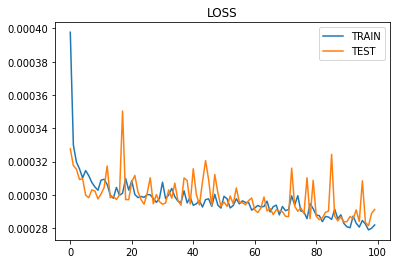

In [8]:
# LSTM-Regression
LSTMmodel = Sequential()
LSTMmodel.add(LSTM(64, activation='relu', return_sequences=True, input_shape = input_shape))
LSTMmodel.add(Dropout(0.4))
LSTMmodel.add(LSTM(50, activation='relu'))
LSTMmodel.add(Dense(1))
LSTMmodel.compile(optimizer='adam', loss='mse',  metrics=['accuracy'])

history = LSTMmodel.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

13/13 [==============================] - 1s 88ms/step


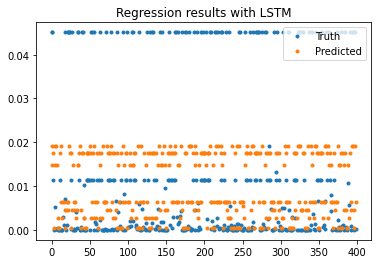

In [12]:
y_pred = LSTMmodel.predict(X_test)
x = np.arange(399)
plt.figure()
plt.plot(x,y_test, '.')
plt.plot(x,y_pred, '.')
plt.legend(["Truth", "Predicted"], loc ="upper right")
plt.title("Regression results with LSTM")
plt.show()

In [ ]:
# BLSTM-Regression

In [17]:
BLmodel = Sequential()
BLmodel.add(Bidirectional(LSTM(50, activation='relu'), input_shape= input_shape))
BLmodel.add(Dense(1))
BLmodel.compile(optimizer='adam', loss='mse')

history = BLmodel.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 16s 585ms/step - loss: 0.0012 - val_loss: 5.1425e-04
Epoch 2/100
25/25 [==============================] - 15s 583ms/step - loss: 3.8693e-04 - val_loss: 3.4586e-04
Epoch 3/100
25/25 [==============================] - 14s 576ms/step - loss: 3.2664e-04 - val_loss: 3.2998e-04
Epoch 4/100
25/25 [==============================] - 15s 581ms/step - loss: 3.1571e-04 - val_loss: 3.2183e-04
Epoch 5/100
25/25 [==============================] - 14s 581ms/step - loss: 3.0620e-04 - val_loss: 3.1618e-04
Epoch 6/100
25/25 [==============================] - 14s 580ms/step - loss: 3.0421e-04 - val_loss: 3.1602e-04
Epoch 7/100
25/25 [==============================] - 15s 584ms/step - loss: 3.0221e-04 - val_loss: 3.1134e-04
Epoch 8/100
25/25 [==============================] - 15s 581ms/step - loss: 2.9858e-04 - val_loss: 3.0598e-04
Epoch 9/100
25/25 [==============================] - 15s 584ms/step - loss: 2.9986e-04 - val_loss: 3.1234e-04
Epoch 10/100
2

25/25 [==============================] - 15s 584ms/step - loss: 2.9007e-04 - val_loss: 3.0107e-04
Epoch 71/100
25/25 [==============================] - 15s 587ms/step - loss: 2.9144e-04 - val_loss: 2.9354e-04
Epoch 72/100
25/25 [==============================] - 15s 583ms/step - loss: 2.8721e-04 - val_loss: 2.9499e-04
Epoch 73/100
25/25 [==============================] - 15s 585ms/step - loss: 2.8769e-04 - val_loss: 3.0693e-04
Epoch 74/100
25/25 [==============================] - 15s 584ms/step - loss: 2.9825e-04 - val_loss: 2.9409e-04
Epoch 75/100
25/25 [==============================] - 15s 586ms/step - loss: 2.8968e-04 - val_loss: 2.9317e-04
Epoch 76/100
25/25 [==============================] - 15s 582ms/step - loss: 2.8779e-04 - val_loss: 3.0882e-04
Epoch 77/100
25/25 [==============================] - 14s 581ms/step - loss: 2.8629e-04 - val_loss: 2.9034e-04
Epoch 78/100
25/25 [==============================] - 15s 584ms/step - loss: 2.8708e-04 - val_loss: 2.9768e-04
Epoch 79/100
2

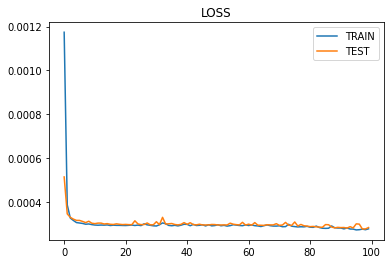

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

13/13 [==============================] - 1s 84ms/step


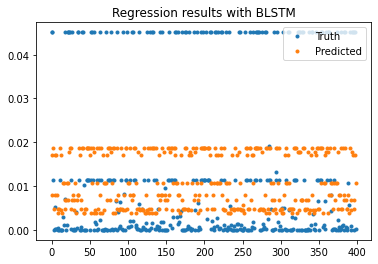

In [16]:
y_pred = BLmodel.predict(X_test)
x = np.arange(399)
plt.figure()
plt.plot(x,y_test, '.')
plt.plot(x,y_pred, '.')
plt.legend(["Truth", "Predicted"], loc ="upper right")
plt.title("Regression results with BLSTM")
plt.show()